In [213]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [214]:
def update_mu(n, ybar, sig2, mu_0, sig2_0):
    sig2_1 = 1.0 / (n / sig2 + 1.0 / sig2_0)
    mu_1 = sig2_1 * (n * ybar / sig2 + mu_0 / sig2_0)    
    return np.random.normal(mu_1, math.sqrt(sig2_1))

In [215]:
def update_sig2(n, y, mu, nu_0, beta_0):
    nu_1 = nu_0 + n / 2.0
    sumsq = np.sum(np.subtract(y, mu)**2) # vectorized
    beta_1 = beta_0 + sumsq / 2.0
    out_gamma = np.random.gamma(nu_1, 1.0/beta_1) # rate for gamma is shape for inv-gamma
    return 1.0 / out_gamma # reciprocal of a gamma random variable is distributed inv-gamma

In [216]:
def gibbs(y, n_iter, init, prior):
    ybar = np.mean(y)
    n = len(y)
  
    ## initialize
    mu_out = np.zeros(n_iter)
    sig2_out = np.zeros(n_iter)
  
    mu_now = init.mu

    ## Gibbs sampler
    for i in range(n_iter):
        sig2_now = update_sig2(n=n, y=y, mu=mu_now, nu_0=prior.nu_0, beta_0=prior.beta_0)
        mu_now = update_mu(n=n, ybar=ybar, sig2=sig2_now, mu_0=prior.mu_0, sig2_0=prior.sig2_0)
        
        sig2_out[i] = sig2_now
        mu_out[i] = mu_now
        
    class Result:
        pass
    
    result = Result()
    result.mu = mu_out
    result.sig2 = sig2_out  
    return result

In [217]:
y = np.array([1.2, 1.4, -0.5, 0.3, 0.9, 2.3, 1.0, 0.1, 1.3, 1.9])
ybar = np.mean(y)
n = len(y)

## prior
class Prior:
    pass

prior = Prior()      
prior.mu_0 = 0.0
#prior.mu_0 = 1.0
prior.sig2_0 = 1.0
prior.n_0 = 2.0 # prior effective sample size for sig2
prior.s2_0 = 1.0 # prior point estimate for sig2
prior.nu_0 = prior.n_0 / 2.0 # prior parameter for inverse-gamma
prior.beta_0 = prior.n_0 * prior.s2_0 / 2.0 # prior parameter for inverse-gamma

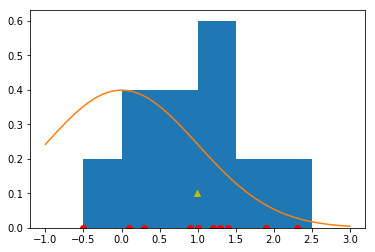

In [218]:
bins = np.linspace(-1, 3, 9)
bins[4]+=1e-5 # a liitle hack for matchng original plotting
hist = plt.hist(y, normed=True, bins=bins)
x = np.linspace(-1, 3, 50)
curv = plt.plot(x, st.norm.pdf(x, prior.mu_0, math.sqrt(prior.sig2_0)))
points = plt.plot(y, np.zeros(len(y)), 'ro')
data_mean = plt.plot(ybar, 0.1, 'y^')

In [219]:
np.random.seed(1)

class init:
    pass

init.mu = 0.0

post = gibbs(y=y, n_iter=5000, init=init, prior=prior)

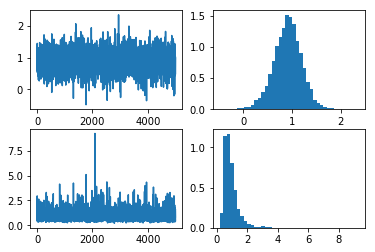

In [220]:
plt.subplot(221)
mu_trace = plt.plot(post.mu)
plt.subplot(222)
mu_density = plt.hist(post.mu, bins = 40, normed=True)
plt.subplot(223)
mu_trace = plt.plot(post.sig2)
plt.subplot(224)
mu_density = plt.hist(post.sig2, bins = 40, normed=True)

In [221]:
print('mu mean =', np.mean(post.mu))
print('sig2 mean =', np.mean(post.sig2))

mu mean = 0.905152888042
sig2 mean = 0.925497779379
